<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/FINAL_Data_201_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree Classification and Regression for Firefighter Fatality Dataset**

In [ ]:
# Importing Packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

### **Data Tidying and Preparation**

We will use decision trees to classify the age of firefighter death as under 50 or over 50.

**Remove the chunk below that mounts the google drive and change code to the chunk after as follows:**

###Import data
data = pd.read_csv('firefighter.csv')
data.head()

In [ ]:
# Import data
data = pd.read_csv('firefighter.csv')
data.head()

First Name    Last Name Age  ... Emergency     Property Type Unnamed: 13
0     Robert      Pollard  64  ...       Yes  Outdoor Property         NaN
1        Lee        Purdy  57  ...       Yes       Residential         NaN
2     Ronald      Osadacz  36  ...       Yes       Street/Road         NaN
3      Allen     Streeter  58  ...       Yes  Outdoor Property         NaN
4       Gary  Bankert, Sr  37  ...        No               NaN         NaN

[5 rows x 14 columns]

In [ ]:
data.shape

(2005, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   First Name        2005 non-null   object
 1   Last Name         2004 non-null   object
 2   Age               1646 non-null   object
 3   Rank              1998 non-null   object
 4   Classification    2002 non-null   object
 5   Date of Incident  2004 non-null   object
 6   Date of Death     2005 non-null   object
 7   Cause Of Death    1995 non-null   object
 8   Nature Of Death   2002 non-null   object
 9   Duty              2002 non-null   object
 10  Activity          1996 non-null   object
 11  Emergency         2005 non-null   object
 12  Property Type     1800 non-null   object
 13  Unnamed: 13       1 non-null      object
dtypes: object(14)
memory usage: 219.4+ KB


In [ ]:
data.isnull().sum()

First Name             0
Last Name              1
Age                  359
Rank                   7
Classification         3
Date of Incident       1
Date of Death          0
Cause Of Death        10
Nature Of Death        3
Duty                   3
Activity               9
Emergency              0
Property Type        205
Unnamed: 13         2004
dtype: int64

In [ ]:
# Delete Unnamed: 13 column with majority of null information
data = data.drop(['Unnamed: 13'], axis=1)

In [ ]:
# Drop remaining NaN values
data = data.dropna()

In [ ]:
# Check that null values are dropped
data.isnull().sum()

First Name          0
Last Name           0
Age                 0
Rank                0
Classification      0
Date of Incident    0
Date of Death       0
Cause Of Death      0
Nature Of Death     0
Duty                0
Activity            0
Emergency           0
Property Type       0
dtype: int64

In [ ]:
data.head(1)

First Name Last Name Age  ...           Activity Emergency     Property Type
0     Robert   Pollard  64  ...  Vehicle Passenger       Yes  Outdoor Property

[1 rows x 13 columns]

In [ ]:
data.dtypes

First Name          object
Last Name           object
Age                 object
Rank                object
Classification      object
Date of Incident    object
Date of Death       object
Cause Of Death      object
Nature Of Death     object
Duty                object
Activity            object
Emergency           object
Property Type       object
dtype: object

In [ ]:
data.Age.astype(int)

0       64
1       57
2       36
3       58
5       53
        ..
1997    56
1998    43
1999    91
2000    19
2004    28
Name: Age, Length: 1433, dtype: int64

In [ ]:
data.head()

First Name Last Name  ... Emergency     Property Type
0     Robert   Pollard  ...       Yes  Outdoor Property
1        Lee     Purdy  ...       Yes       Residential
2     Ronald   Osadacz  ...       Yes       Street/Road
3      Allen  Streeter  ...       Yes  Outdoor Property
5       Juan   De Leon  ...        No      Store/Office

[5 rows x 13 columns]

In [ ]:
data.Age.max()

'95'

In [ ]:
data.Age.min()

'14'

In [ ]:
data.Age.astype(int)

0       64
1       57
2       36
3       58
5       53
        ..
1997    56
1998    43
1999    91
2000    19
2004    28
Name: Age, Length: 1433, dtype: int64

In [ ]:
data_agegroup = pd.cut(data.Age.astype(int),bins=[0,19,29,39,49, 59, 69, 79, 89, 99],labels=['10-19','20-29','30-39','40-49','50-59','60-69', '70-79', '80-89','90-99'])
data.insert(3,'Age_Group', data_agegroup)

In [ ]:
data.head(5)

First Name Last Name  ... Emergency     Property Type
0     Robert   Pollard  ...       Yes  Outdoor Property
1        Lee     Purdy  ...       Yes       Residential
2     Ronald   Osadacz  ...       Yes       Street/Road
3      Allen  Streeter  ...       Yes  Outdoor Property
5       Juan   De Leon  ...        No      Store/Office

[5 rows x 14 columns]

In [ ]:
# Changing Date to datetime
data['Date of Incident'] = pd.to_datetime(data['Date of Incident'])

In [ ]:
# Making New Column for Year
data["Year"] = data["Date of Incident"].dt.year

In [ ]:
data.head()

First Name Last Name Age  ... Emergency     Property Type  Year
0     Robert   Pollard  64  ...       Yes  Outdoor Property  1999
1        Lee     Purdy  57  ...       Yes       Residential  2000
2     Ronald   Osadacz  36  ...       Yes       Street/Road  2000
3      Allen  Streeter  58  ...       Yes  Outdoor Property  2000
5       Juan   De Leon  53  ...        No      Store/Office  2000

[5 rows x 15 columns]

In [ ]:
data.Year.max()

2015

In [ ]:
data.Year.min()

1978

In [ ]:
data_decade = pd.cut(data.Year.astype(int),bins=[0,1979,1989,1999,2009, 2019],labels=['1970','1980','1990','2000','2010'])
data.insert(3,'Decade', data_decade)

In [ ]:
data.head()

First Name Last Name Age  ... Emergency     Property Type  Year
0     Robert   Pollard  64  ...       Yes  Outdoor Property  1999
1        Lee     Purdy  57  ...       Yes       Residential  2000
2     Ronald   Osadacz  36  ...       Yes       Street/Road  2000
3      Allen  Streeter  58  ...       Yes  Outdoor Property  2000
5       Juan   De Leon  53  ...        No      Store/Office  2000

[5 rows x 16 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 2004
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   First Name        1433 non-null   object        
 1   Last Name         1433 non-null   object        
 2   Age               1433 non-null   object        
 3   Decade            1433 non-null   category      
 4   Age_Group         1433 non-null   category      
 5   Rank              1433 non-null   object        
 6   Classification    1433 non-null   object        
 7   Date of Incident  1433 non-null   datetime64[ns]
 8   Date of Death     1433 non-null   object        
 9   Cause Of Death    1433 non-null   object        
 10  Nature Of Death   1433 non-null   object        
 11  Duty              1433 non-null   object        
 12  Activity          1433 non-null   object        
 13  Emergency         1433 non-null   object        
 14  Property Type     1433 n

###**EDA and Visualizations**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


[Text(0.5, 1.0, 'Fatalities by Decade')]

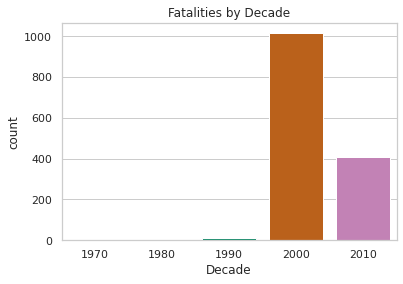

In [ ]:
decade_order = ["1970", "1980", "1990", "2000", "2010"]
sns.countplot(x = "Decade", data = data, order = decade_order).set(title='Fatalities by Decade')

No handles with labels found to put in legend.


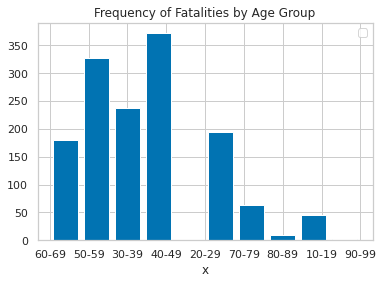

In [ ]:
plt.hist(data.Age_Group, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.title('Frequency of Fatalities by Age Group')
plt.legend()
plt.show()

[Text(0.5, 1.0, 'Fatalities by Age Group')]

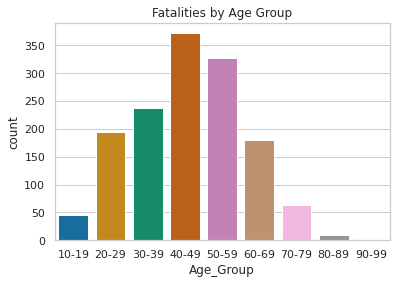

In [ ]:
age_order = ["10-19", "20-29", "30-39", "40-49", "50-59", '60-69', '70-79', '80-89', '90-99']
sns.countplot(x = "Age_Group", data = data, order = age_order).set(title='Fatalities by Age Group')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

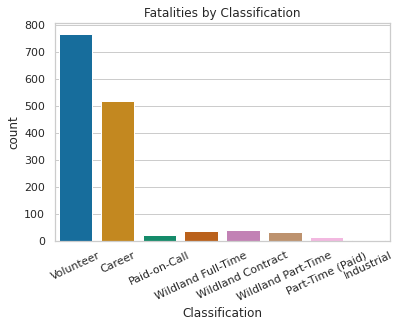

In [ ]:
sns.countplot(x = "Classification", data = data).set(title='Fatalities by Classification')

plt.xticks(rotation = 25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

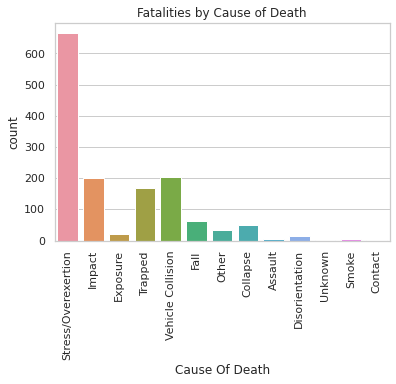

In [ ]:
sns.countplot(x = "Cause Of Death", data = data).set(title='Fatalities by Cause of Death')

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

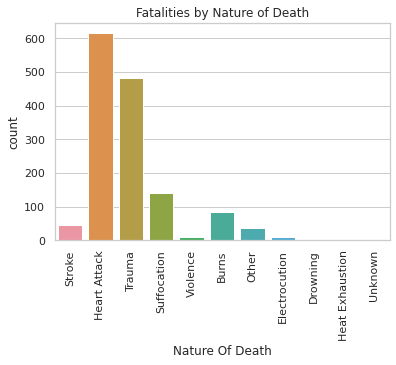

In [ ]:
sns.countplot(x = "Nature Of Death", data = data).set(title='Fatalities by Nature of Death')

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

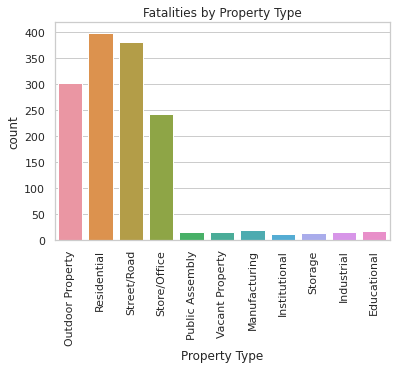

In [ ]:
sns.countplot(x = "Property Type", data = data).set(title='Fatalities by Property Type')

plt.xticks(rotation = 90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

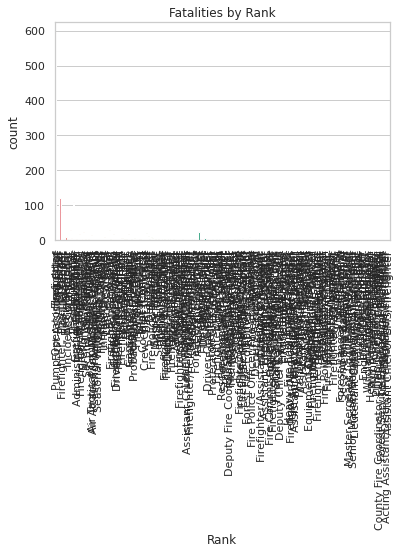

In [ ]:
# Too many unique variables to plot
sns.countplot(x = "Rank", data = data).set(title='Fatalities by Rank')

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

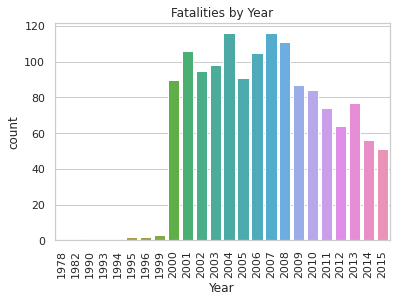

In [ ]:
sns.countplot(x = "Year", data = data).set(title='Fatalities by Year')

plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

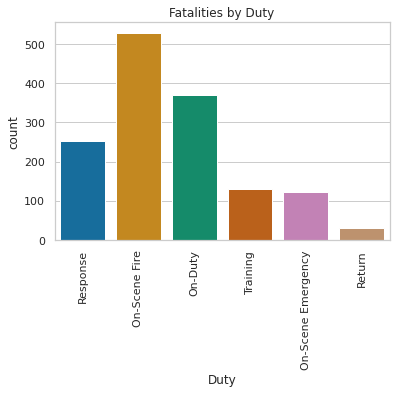

In [ ]:
sns.countplot(x = "Duty", data = data).set(title='Fatalities by Duty')

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

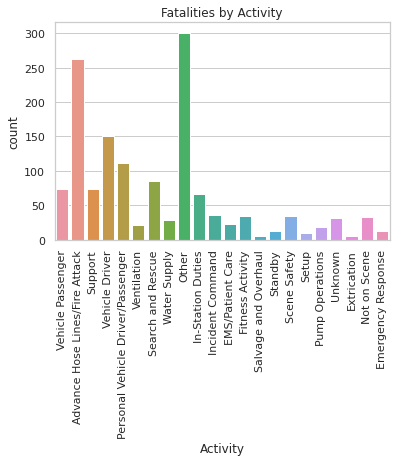

In [ ]:
sns.countplot(x = "Activity", data = data).set(title='Fatalities by Activity')

plt.xticks(rotation = 90)

[Text(0.5, 1.0, 'Fatalities by Emergency Status')]

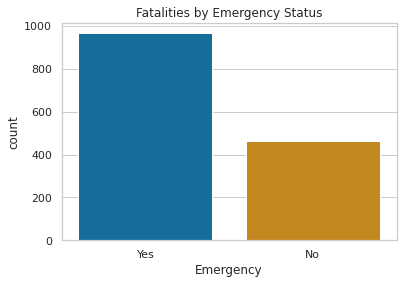

In [ ]:
sns.countplot(x = "Emergency", data = data).set(title='Fatalities by Emergency Status')



In [ ]:
data.Decade.value_counts()

2000    1015
2010     406
1990      10
1980       1
1970       1
Name: Decade, dtype: int64

In [ ]:
# Import & Change Dates Format
import datetime
import datetime as dt
data['DOI T1'] = pd.to_datetime(data['Date of Incident'])
data['DOD T2'] = pd.to_datetime(data['Date of Death'])
data.head()

First Name Last Name Age Decade  ...     Property Type  Year     DOI T1     DOD T2
0     Robert   Pollard  64   1990  ...  Outdoor Property  1999 1999-12-31 2000-01-01
1        Lee     Purdy  57   2000  ...       Residential  2000 2000-01-08 2000-01-08
2     Ronald   Osadacz  36   2000  ...       Street/Road  2000 2000-01-11 2000-01-11
3      Allen  Streeter  58   2000  ...  Outdoor Property  2000 2000-01-11 2000-01-11
5       Juan   De Leon  53   2000  ...      Store/Office  2000 2000-01-17 2000-01-17

[5 rows x 18 columns]

In [ ]:
data['Time Difference'] = data['DOD T2'].sub(data['DOI T1'], axis=0)
data.head()

First Name Last Name Age Decade  ...  Year     DOI T1     DOD T2 Time Difference
0     Robert   Pollard  64   1990  ...  1999 1999-12-31 2000-01-01          1 days
1        Lee     Purdy  57   2000  ...  2000 2000-01-08 2000-01-08          0 days
2     Ronald   Osadacz  36   2000  ...  2000 2000-01-11 2000-01-11          0 days
3      Allen  Streeter  58   2000  ...  2000 2000-01-11 2000-01-11          0 days
5       Juan   De Leon  53   2000  ...  2000 2000-01-17 2000-01-17          0 days

[5 rows x 19 columns]

In [ ]:
data['Difference'] = (data['DOD T2'] - data['DOI T1']).dt.days
data.head(1)

First Name Last Name Age  ...     DOD T2 Time Difference Difference
0     Robert   Pollard  64  ... 2000-01-01          1 days          1

[1 rows x 20 columns]

In [ ]:
data['Month'] = pd.DatetimeIndex(data['Date of Incident']).month
data.head(1)

First Name Last Name Age Decade  ...     DOD T2 Time Difference Difference Month
0     Robert   Pollard  64   1990  ... 2000-01-01          1 days          1    12

[1 rows x 21 columns]

[Text(0.5, 1.0, 'Fatalities by Month')]

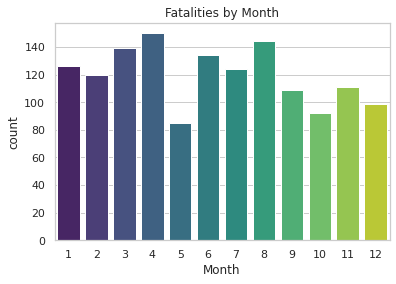

In [ ]:
## Total Fataliies by month seaborn plot 
sns.set_theme(style="whitegrid")
sns.countplot(x = "Month", data = data, palette = 'viridis').set(title='Fatalities by Month')


In [ ]:
Monthdf= data.groupby(['Month']).count()
Monthdf

First Name  Last Name  Age  ...  DOD T2  Time Difference  Difference
Month                              ...                                     
1             126        126  126  ...     126              126         126
2             120        120  120  ...     120              120         120
3             139        139  139  ...     139              139         139
4             150        150  150  ...     150              150         150
5              85         85   85  ...      85               85          85
6             134        134  134  ...     134              134         134
7             124        124  124  ...     124              124         124
8             144        144  144  ...     144              144         144
9             109        109  109  ...     109              109         109
10             92         92   92  ...      92               92          92
11            111        111  111  ...     111              111         111
12             99         99   99  ...      99               99          99

[12 rows x 20 columns]

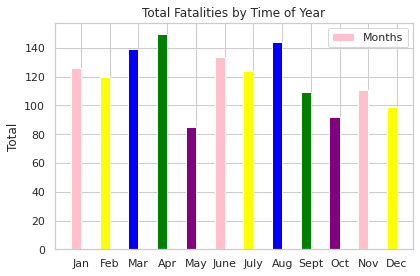

In [ ]:
## Total Fataliies by month  
labels = ["Jan","Feb", "Mar", "Apr", "May","June","July","Aug","Sept","Oct","Nov","Dec"]
month_total = [126,120,139,150,85,134,124,144,109,92,111,99]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 =ax.bar(x - width/2, month_total, width, label='Months', color=['pink','yellow','blue','green','purple'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('Total Fatalities by Time of Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
data_cause= data.groupby(['Cause Of Death','Difference']).count()
data_cause

First Name  Last Name  ...  Time Difference  Month
Cause Of Death    Difference                         ...                        
Assault           0                    3          3  ...                3      3
                  1                    1          1  ...                1      1
Collapse          0                   42         42  ...               42     42
                  1                    2          2  ...                2      2
                  2                    1          1  ...                1      1
...                                  ...        ...  ...              ...    ...
Vehicle Collision 184                  1          1  ...                1      1
                  211                  1          1  ...                1      1
                  1526                 1          1  ...                1      1
                  2863                 1          1  ...                1      1
                  7106                 1          1  ...                1      1

[130 rows x 19 columns]

(0.0, 90.0)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


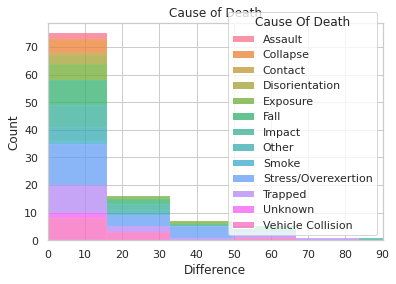

In [ ]:
sns.histplot(data=data_cause, x="Difference", hue="Cause Of Death", multiple="stack").set(title='Cause of Death')
plt.xlim(0,90)

###**Preparing the Data for Decision Tree Analysis**

In [ ]:
# Dropping unused columns and the quantitative continuous target column of "Age" and assigning remaining columns to 'x'
# Assigning target column to 'y'
x = pd.DataFrame(data.drop(['First Name', 'Last Name','Age', 'Decade', 'Age_Group','DOI T1', 'DOD T2','Time Difference','Difference','Month'], axis=1))
y = pd.DataFrame(data['Age'])

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x.head()

Rank Classification  ...     Property Type  Year
0              Firefighter      Volunteer  ...  Outdoor Property  1999
1  Pump Operator/Inspector      Volunteer  ...       Residential  2000
2    First Assistant Chief      Volunteer  ...       Street/Road  2000
3              Firefighter      Volunteer  ...  Outdoor Property  2000
5                  Captain         Career  ...      Store/Office  2000

[5 rows x 11 columns]

In [ ]:
x.Classification.unique()

array(['Volunteer', 'Career', 'Paid-on-Call', 'Wildland Full-Time',
       'Wildland Contract', 'Wildland Part-Time', 'Part-Time (Paid)',
       'Industrial'], dtype=object)

In [ ]:
x.Classification.unique()

array(['Volunteer', 'Career', 'Paid-on-Call', 'Wildland Full-Time',
       'Wildland Contract', 'Wildland Part-Time', 'Part-Time (Paid)',
       'Industrial'], dtype=object)

In [ ]:
x = x.rename(columns = {"Cause Of Death": "Cause", "Nature Of Death": "Nature", "Property Type": "Property", "Date of Incident": "Date_Incident", "Date of Death": "Date_Death"})
x.head(1)

Rank Classification Date_Incident  ... Emergency          Property  Year
0  Firefighter      Volunteer    1999-12-31  ...       Yes  Outdoor Property  1999

[1 rows x 11 columns]

In [ ]:
data.Year.dtype

dtype('int64')

####**Categorical entries transformed to numeric with LabelEncoder**

First, Look at how many different unique entries are for each column.

In [ ]:
x.Cause.unique()

array(['Stress/Overexertion', 'Impact', 'Exposure', 'Trapped',
       'Vehicle Collision', 'Fall', 'Other', 'Collapse', 'Assault',
       'Disorientation', 'Unknown', 'Smoke', 'Contact'], dtype=object)

In [ ]:
x.Nature.unique()

array(['Stroke', 'Heart Attack', 'Trauma', 'Suffocation', 'Violence',
       'Burns', 'Other', 'Electrocution', 'Drowning', 'Heat Exhaustion',
       'Unknown'], dtype=object)

In [ ]:
x.Duty.unique()

array(['Response', 'On-Scene Fire', 'On-Duty', 'Training',
       'On-Scene Emergency', 'Return'], dtype=object)

In [ ]:
x.Activity.unique()

array(['Vehicle Passenger', 'Advance Hose Lines/Fire Attack', 'Support',
       'Vehicle Driver', 'Personal Vehicle Driver/Passenger',
       'Ventilation', 'Search and Rescue', 'Water Supply', 'Other',
       'In-Station Duties', 'Incident Command', 'EMS/Patient Care',
       'Fitness Activity', 'Salvage and Overhaul', 'Standby',
       'Scene Safety', 'Setup', 'Pump Operations', 'Unknown',
       'Extrication', 'Not on Scene', 'Emergency Response'], dtype=object)

In [ ]:
x.Emergency.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
x.Property.unique()

array(['Outdoor Property', 'Residential', 'Street/Road', 'Store/Office',
       'Public Assembly', 'Vacant Property', 'Manufacturing',
       'Institutional', 'Storage', 'Industrial', 'Educational'],
      dtype=object)

**Apply LabelEncoder() from sklearn**

Provides unique qualitative entries with consistent numerical code also known as factorizing categorical data.

In [ ]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
x['Activity'] = label.fit_transform(x['Activity']) 
x['Cause'] = label.fit_transform(x['Cause']) 
x['Classification'] = label.fit_transform(x['Classification']) 
x['Duty'] = label.fit_transform(x['Duty']) 
x['Emergency']= label.fit_transform(x['Emergency']) 
x['Nature'] = label.fit_transform(x['Nature']) 
x['Property']= label.fit_transform(x['Property'])
x['Rank'] = label.fit_transform(x['Rank'])

In [ ]:
x.head()

Rank  Classification Date_Incident  ... Emergency  Property  Year
0   100               4    1999-12-31  ...         1         4  1999
1   195               4    2000-01-08  ...         1         6  2000
2   150               4    2000-01-11  ...         1         9  2000
3   100               4    2000-01-11  ...         1         4  2000
5    24               0    2000-01-17  ...         0         8  2000

[5 rows x 11 columns]

In [ ]:
#Drop the Date columns
x = x.drop(['Date_Incident', 'Date_Death'], axis=1)
x.head()

Rank  Classification  Cause  Nature  ...  Activity  Emergency  Property  Year
0   100               4      9       6  ...        19          1         4  1999
1   195               4      9       3  ...         0          1         6  2000
2   150               4      9       3  ...         0          1         9  2000
3   100               4      9       3  ...         0          1         4  2000
5    24               0      9       3  ...        16          0         8  2000

[5 rows x 9 columns]

In [ ]:
# Way to even out subset row number, but instead I removed all NaN's from dataset prior to splitting subsets
#remove_n = 223
#drop_indices = np.random.choice(x.index, remove_n, replace=False)

In [ ]:
#drop_indices

In [ ]:
#x = x.drop(drop_indices)

In [ ]:
x.shape

(1433, 9)

In [ ]:
y[0:10]

Age
0   64
1   57
2   36
3   58
5   53
7   47
8   23
9   74
10  59
11  42

**Encoding the categorical target variable**

We will encode >50 as 1 and <50 as 0

In [ ]:
y.head()

Age
0  64
1  57
2  36
3  58
5  53

The following work with null values is no longer necessary since dealing with the null values at the beginning.

In [ ]:
#y.isnull().sum()

In [ ]:
#y.dropna()

In [ ]:
#y.isnull().sum()

In [ ]:
#y = y.apply (pd.to_numeric, errors='coerce')
#y = y.dropna()

In [ ]:
#y.isnull().sum()

In [ ]:
y.astype(int)

Age
0      64
1      57
2      36
3      58
5      53
...   ...
1997   56
1998   43
1999   91
2000   19
2004   28

[1433 rows x 1 columns]

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 2004
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     1433 non-null   object
dtypes: object(1)
memory usage: 62.4+ KB


In [ ]:
#Found a more efficient way to apply binary entry for above and below 50 years old
#y = data['Age'].map({>50:1, <50:0})
#y[0:10]

####**Separating Age into Binary >50 and <50**

In [ ]:
y = pd.DataFrame(np.where(y.Age.astype(int) >= 50, 1, 0), columns=y.columns)

In [ ]:
y.head()

Age
0    1
1    1
2    0
3    1
4    1

In [ ]:
# Running linear regression to show not a good fit
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

In [ ]:
# R squared
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.0688012518182275


In [ ]:
import numpy as np


new_model = LinearRegression().fit(x, y)
print('intercept:', new_model.intercept_)

intercept: [-2.11366492]


In [ ]:
print('slope:', new_model.coef_)

slope: [[-0.00046623  0.02166052 -0.00413779 -0.03811527 -0.033711    0.00574686
  -0.00407886  0.01173476  0.00133257]]


In [ ]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[0.37515382]
 [0.39453086]
 [0.41700433]
 ...
 [0.40275441]
 [0.3666098 ]
 [0.2528101 ]]


In [ ]:
data.head()

First Name Last Name Age Decade  ...     DOD T2 Time Difference Difference Month
0     Robert   Pollard  64   1990  ... 2000-01-01          1 days          1    12
1        Lee     Purdy  57   2000  ... 2000-01-08          0 days          0     1
2     Ronald   Osadacz  36   2000  ... 2000-01-11          0 days          0     1
3      Allen  Streeter  58   2000  ... 2000-01-11          0 days          0     1
5       Juan   De Leon  53   2000  ... 2000-01-17          0 days          0     1

[5 rows x 21 columns]

In [ ]:
df = pd.DataFrame(data.drop(['First Name', 'Last Name', 'Decade', 'Age_Group', 'Date of Incident', 'Date of Death'], axis=1))

In [ ]:
df = df.rename(columns = {"Cause Of Death": "Cause", "Nature Of Death": "Nature", "Property Type": "Property"})

In [ ]:
df.head(1)

Age         Rank Classification  ... Time Difference Difference Month
0  64  Firefighter      Volunteer  ...          1 days          1    12

[1 rows x 15 columns]

In [ ]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
df['Activity'] = label.fit_transform(df['Activity']) 
df['Cause'] = label.fit_transform(x['Cause']) 
df['Classification'] = label.fit_transform(df['Classification']) 
df['Duty'] = label.fit_transform(df['Duty']) 
df['Emergency']= label.fit_transform(df['Emergency']) 
df['Nature'] = label.fit_transform(df['Nature']) 
df['Property']= label.fit_transform(df['Property'])
df['Rank'] = label.fit_transform(df['Rank'])
#df['Age']=label.fit_transform(df['Age'])

In [ ]:
df.head(1)

Age  Rank  Classification  ...  Time Difference  Difference  Month
0  64   100               4  ...           1 days           1     12

[1 rows x 15 columns]

**Attempting Linear Regression to Demonstrate it's Poor Fit**

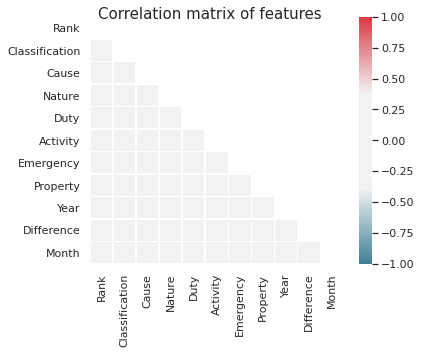

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
#ax.text(0.77, 0.2, 'a', fontsize=13, ha='center', va='center',
         #transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

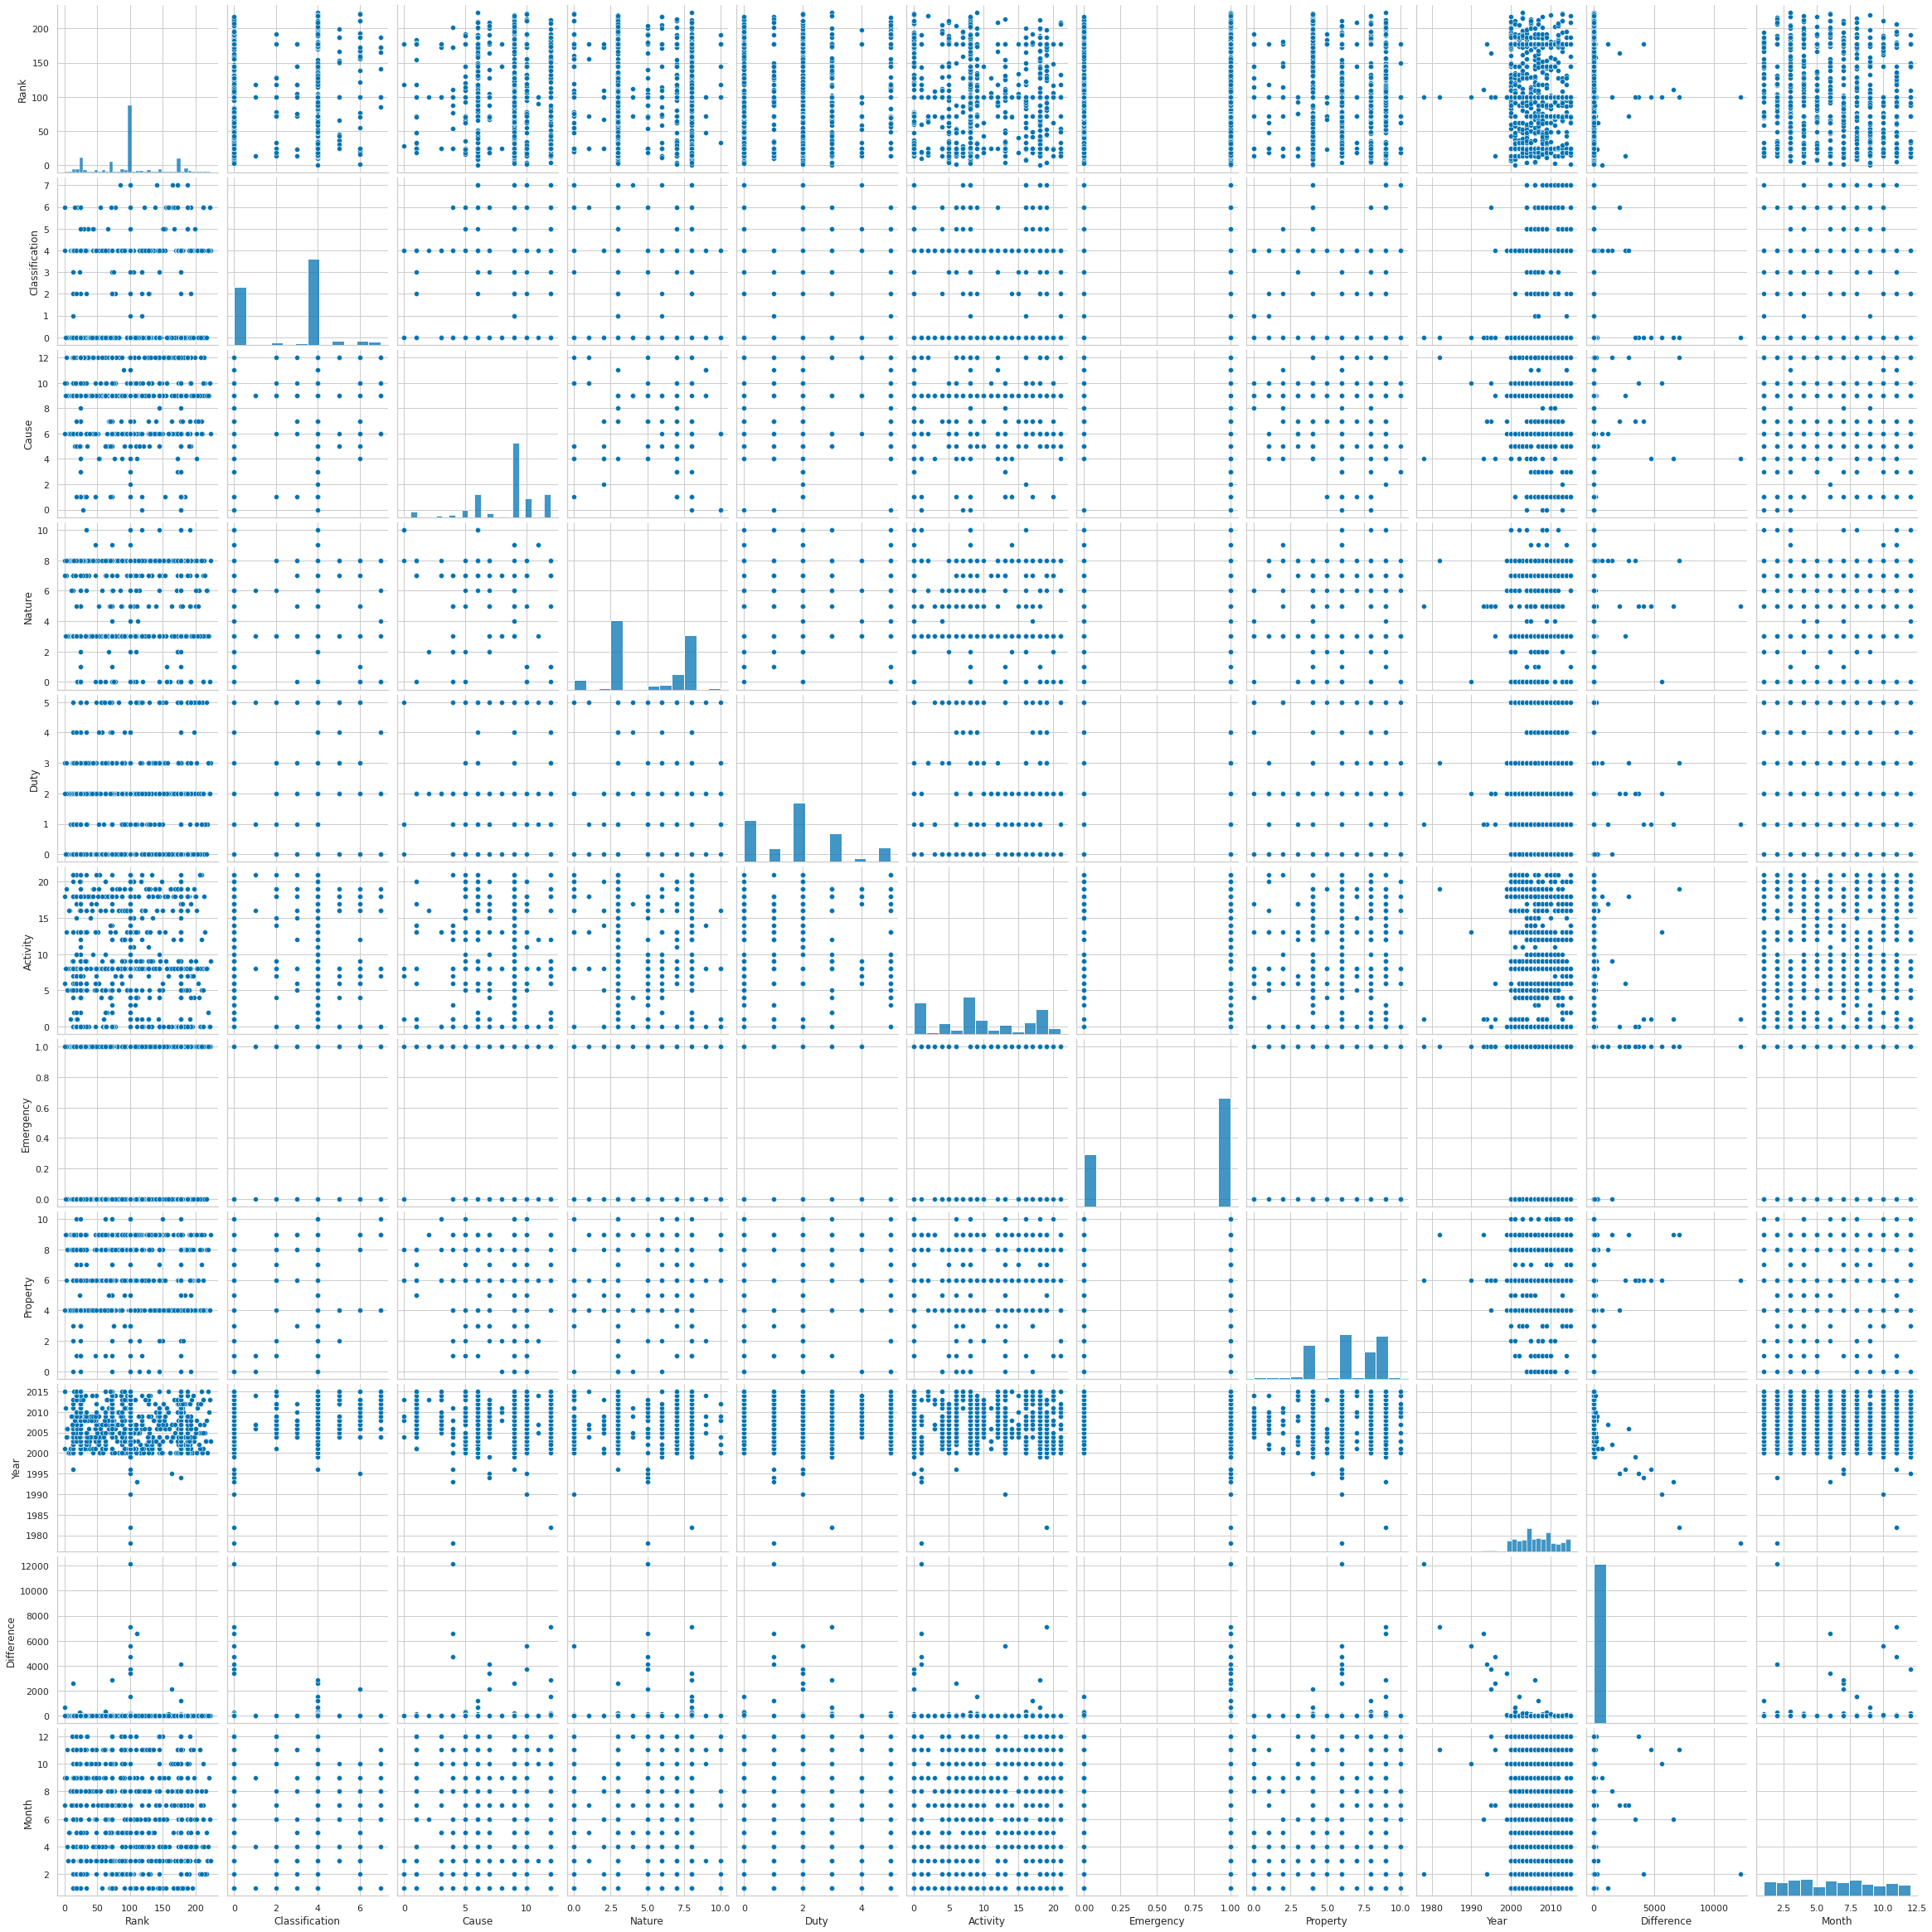

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

These pairplots show us that the data does not intersect so as to fit a linear model.

Pearson correlation coefficient matrix of each variables:
                     Year  Property  ...  Classification      Rank
Year            1.000000 -0.041665  ...        0.140927 -0.005412
Property       -0.041665  1.000000  ...       -0.057150 -0.059758
Emergency      -0.038478  0.007172  ...        0.117530  0.025127
Activity       -0.121197  0.131683  ...        0.068810 -0.040590
Duty           -0.077667 -0.064352  ...        0.053324  0.008770
Nature         -0.069176  0.152638  ...       -0.051281  0.058580
Cause           0.092211 -0.017506  ...        0.133021 -0.000419
Classification  0.140927 -0.057150  ...        1.000000 -0.027731
Rank           -0.005412 -0.059758  ...       -0.027731  1.000000

[9 rows x 9 columns]


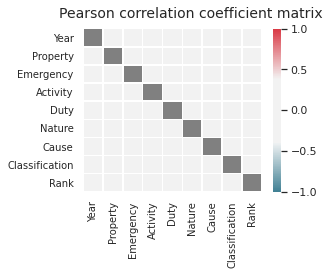

In [ ]:

corr = df[['Year', 'Property', 'Emergency', 'Activity', 'Duty','Nature','Cause','Classification','Rank','Age']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

The lack of usable data from the Pearson Correlation Coefficient Matrix signals that a linear approach to interpreting and testing this data is not appropriate.  Hence, the output below falls within the "Warnings" note listed at the end of the output.

In [ ]:
import statsmodels.api as sm
X = df[['Classification', 'Nature']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df.Age.astype(int), X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     50.63
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           5.71e-22
Time:                        01:50:23   Log-Likelihood:                -5837.4
No. Observations:                1433   AIC:                         1.168e+04
Df Residuals:                    1430   BIC:                         1.170e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             52.1624      0.967     53.

In [ ]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.06612384821379935


In [ ]:
#F-Test(ANOVA)
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 50.6261471421431
Probability of observing value at least as high as F-statistic: 5.712665706093721e-22


In [ ]:
print(olsmod.pvalues)

const             0.000000e+00
Classification    1.116939e-01
Nature            3.717731e-22
dtype: float64


In [ ]:
df.Age.astype(float)

0       64.0
1       57.0
2       36.0
3       58.0
5       53.0
        ... 
1997    56.0
1998    43.0
1999    91.0
2000    19.0
2004    28.0
Name: Age, Length: 1433, dtype: float64

In [ ]:
df['age_pred'] = olsmod.predict(X)
df['residual'] = olsmod.resid
df.head()

Age  Rank  Classification  Cause  ...  Difference  Month   age_pred   residual
0  64   100               4      9  ...           1     12  44.875139  19.124861
1  57   195               4      9  ...           0      1  49.090740   7.909260
2  36   150               4      9  ...           0      1  49.090740 -13.090740
3  58   100               4      9  ...           0      1  49.090740   8.909260
5  53    24               0      9  ...           0      1  47.946844   5.053156

[5 rows x 17 columns]

In [ ]:
df.age_pred.dtype

dtype('float64')

In [ ]:
print(df.Age.dtype)
print(df.age_pred.dtype)

object
float64


In [ ]:
df.Age.astype(float)

0       64.0
1       57.0
2       36.0
3       58.0
5       53.0
        ... 
1997    56.0
1998    43.0
1999    91.0
2000    19.0
2004    28.0
Name: Age, Length: 1433, dtype: float64

In [ ]:
# Plotting the observed vs predicted values
#sns.lmplot(x='Classification', y='Nature', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
#line_coords = np.arange(df[['Age', 'age_pred']].min().min()-10, 
   #                     df[['Age', 'age_pred']].max().max()+10)
#plt.plot(line_coords, line_coords,  # X and y points
    #     color='darkorange', linestyle='--')

#plt.ylabel('Predicted Age', fontsize=14)
#plt.xlabel('Actual Age', fontsize=14)
#plt.title('Linearity Assumption', fontsize=16)
#plt.show()

In [ ]:
# Durbin-Watson autocorrelation of the errors(residuals) over time
# Code source: https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.7984445015509054
Little to no autocorrelation 

Assumption satisfied


### **Decision Tree Criteria and Training**



In [ ]:
# Split datset into training set and test set
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2,random_state=99)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [ ]:
# Train Decision Tree Classifier
clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred= clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test, y_pred)

0.6202090592334495

We got a classification rate of 62%.  We can improve the accuracy by tuning the parameters in the Decision Tree Algorithm.

In [ ]:
y_pred=y_pred.reshape(287,1)
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

0.6202090592334495

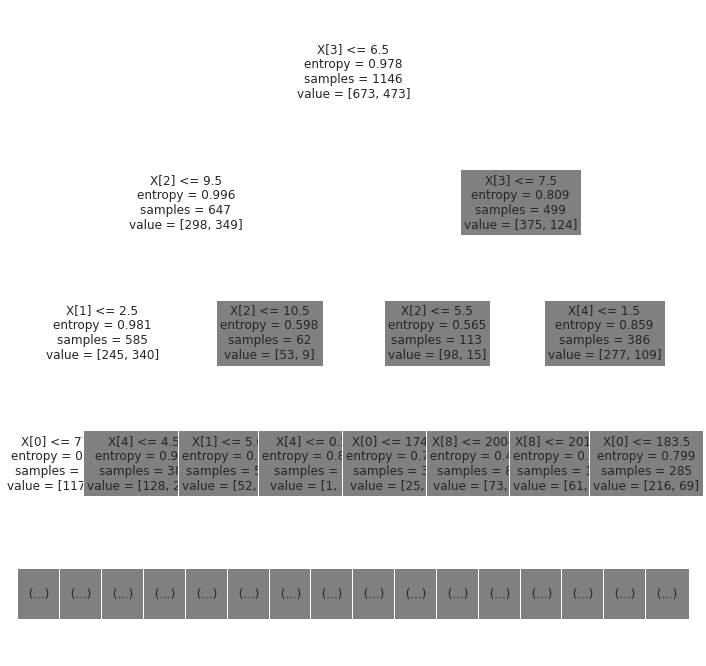

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

In [ ]:
import graphviz
import pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
x.head(1)

Rank  Classification  Cause  Nature  ...  Activity  Emergency  Property  Year
0   100               4      9       6  ...        19          1         4  1999

[1 rows x 9 columns]

In [ ]:
# Creating a complete unpruned Decision Tree
# Code sourced from example at https://www.datacamp.com/community/tutorials/decision-tree-classification-python
feature_cols = ['Rank','Classification','Cause','Nature','Duty','Activity','Emergency','Property','Year']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('firefighter.png')
Image(graph.create_png())

###**Optimizing Decision Tree Performance**

In [ ]:
import sklearn.metrics as metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7073170731707317


The classification rate increased to 70.73%, which is better accuracy than the previous model.

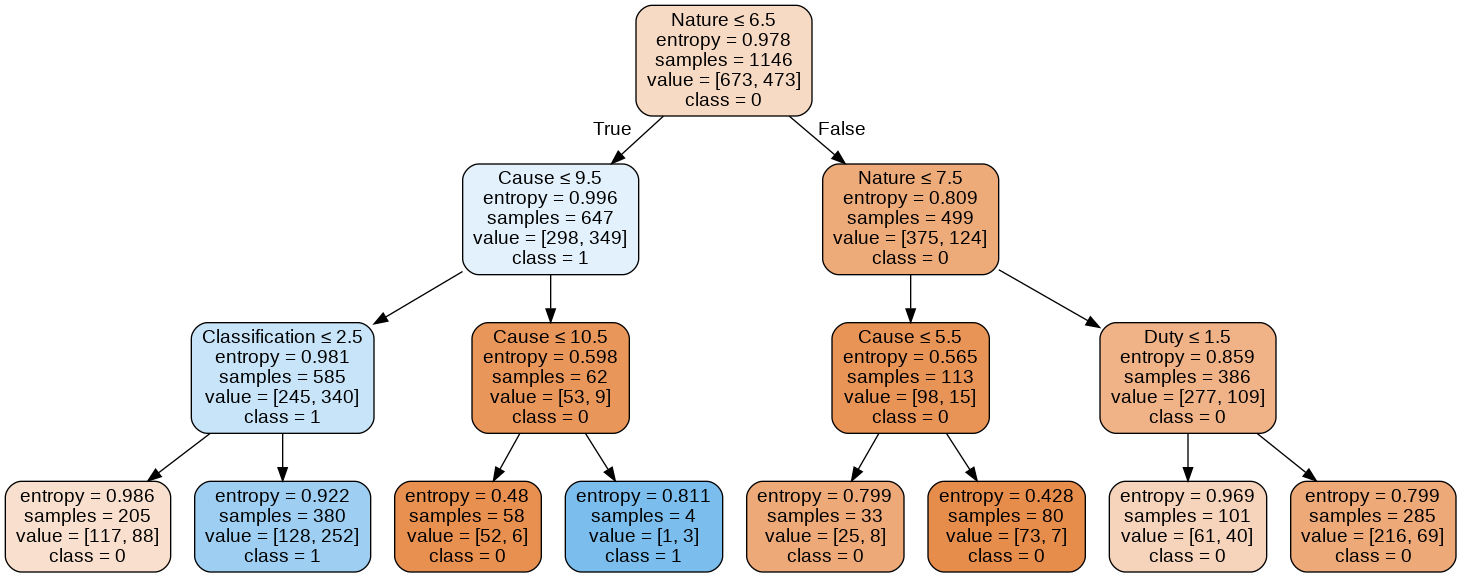

In [ ]:
# Optimized and Pruned Decision Tree Visualization

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('firefighter2.png')
Image(graph.create_png())

####**Probabilities of the occurrence of Age target in the testing set.**

In [ ]:
#This output gives the probabilities of the occurrence of each target every tuple of the testing set.
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
m.fit(x_train,y_train)
m.predict_proba(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.56712017, 0.43287983],
       [0.54629046, 0.45370954],
       [0.71093544, 0.28906456],
       [0.60776868, 0.39223132],
       [0.4601871 , 0.5398129 ],
       [0.55599495, 0.44400505],
       [0.55599665, 0.44400335],
       [0.66318082, 0.33681918],
       [0.41433904, 0.58566096],
       [0.39980186, 0.60019814],
       [0.53584968, 0.46415032],
       [0.34196506, 0.65803494],
       [0.55682661, 0.44317339],
       [0.66185621, 0.33814379],
       [0.46681639, 0.53318361],
       [0.51873844, 0.48126156],
       [0.67760237, 0.32239763],
       [0.50560301, 0.49439699],
       [0.7359382 , 0.2640618 ],
       [0.62355092, 0.37644908],
       [0.49908482, 0.50091518],
       [0.774768  , 0.225232  ],
       [0.36992232, 0.63007768],
       [0.36181268, 0.63818732],
       [0.41049755, 0.58950245],
       [0.60405968, 0.39594032],
       [0.69262216, 0.30737784],
       [0.38899573, 0.61100427],
       [0.38984173, 0.61015827],
       [0.6666519 , 0.3333481 ],
       [0.

In [ ]:
# attempting to print tuples from list above to see relationship to variables
#for x in x_test:
 # print (x[0], x[1])

####**Class predictions of the occurrence of Age target in the testing set** 

In [ ]:
ypred = m.predict(x_test)
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

The predict() method gives the output target as the target with the highest probability in the predict_proba() method.

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,
                            random_state=11)
rf_cl.fit(x_train, y_train)
rf_pred= rf_cl.predict(x_test)
rf_pred=rf_pred.reshape(287,1)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


accuracy: 0.682927


In [ ]:
# Using score method to return the mean accuray on the given test data and labels

m.score(x, y)

0.6371249127704117

In [ ]:
# decision function predicts confidence scores for samples
m.decision_function(x)

array([-0.51528801, -0.24986259, -0.13417676, ..., -0.51390247,
       -0.55145734, -1.02058789])

The Random Forest Classifier created a classification rate of 68.29% which is an improvement of the initial rate but slightly less effective than the most recent optimization code.

#### **XG Boost**

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(x_train, y_train)
preds = xg_cl.predict(x_test)
preds=preds.reshape(287,1)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.693380


The XGBoost Classifier created a classification rate of 69.34% which is an improvement from the Random Forrest Classifier but slightly less effective than the metrics optimization code with 70.73% accuracy.

#### **Cross-Validation**

In [ ]:
# DMatrix is a internal data structure that used is by XGBoost 
# which is optimized for both memory efficiency and training speed
data_dmatrix = xgb.DMatrix(data=x,label=y) 
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True) 
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.706916


The DMatrix created a classification rate of 70.69% which is an improvement from the XGBoost Classifier but slightly less effective than the metrics optimization code with 70.73% accuracy.

####**Decision-Tree for Regression**

In [ ]:
# Regression-Tree
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as mean_squared_error

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

#Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)


In [ ]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)

# Compute test-set RMSE
mse_dt = MSE(y_test, y_pred)

# Compute test-set RMSE
rmse_dt = mse_dt** (1/2)

# Print rmse_dt
print(rmse_dt)

0.45287284124546956


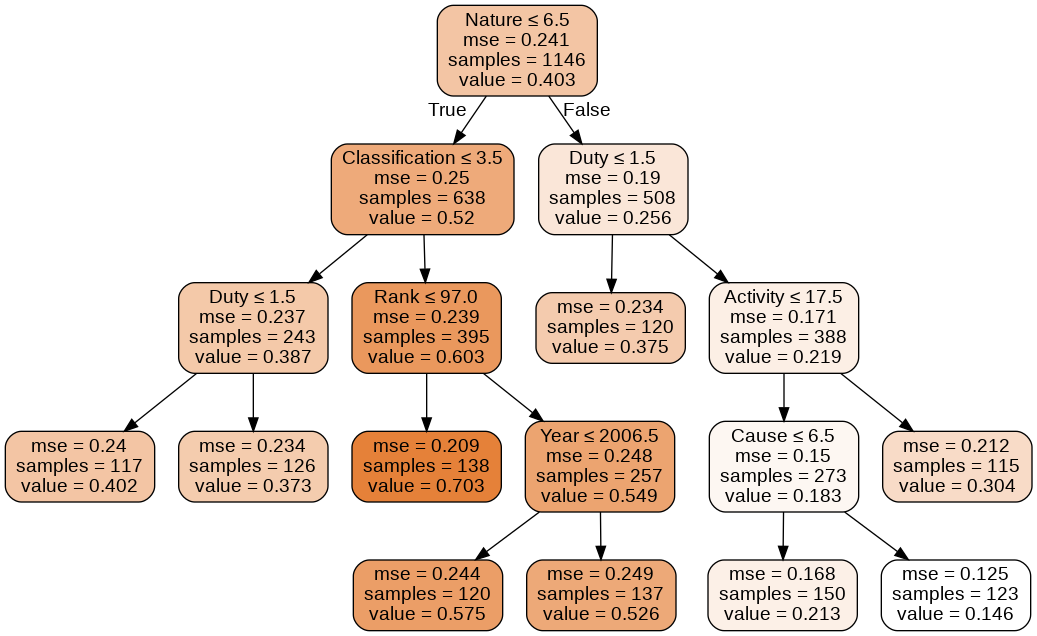

In [ ]:
# Visualizing Regression Tree
# from DataCamp slides on Machine Learning with Tree-Based Models in Python
# to minimize error in particular region
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('firefighter3.png')
Image(graph.create_png())

###**Summary Pros and Cons of Decision Trees**
Sourced from: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

**Pros**

*   Decision trees are easy to interpret and visualize.
*   It can easily capture Non-linear patterns.
*   It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
*   It can be used for feature engineering such as predicting missing values, suitable for variable selection.
*   The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)
*   Can be mixed mode variables with ease - categorial and numerical (from: https://www.youtube.com/watch?v=gYSWrUP4aB0)

**Cons**

*   Sensitive to noisy data. It can overfit noisy data.
*   The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
*   Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.







### **Decision Tree Criteria and Training - Classification Variables**
#####1. **Data Split**

In [ ]:
## Original df used for the split
data.head()

First Name Last Name Age Decade  ...     DOD T2 Time Difference Difference Month
0     Robert   Pollard  64   1990  ... 2000-01-01          1 days          1    12
1        Lee     Purdy  57   2000  ... 2000-01-08          0 days          0     1
2     Ronald   Osadacz  36   2000  ... 2000-01-11          0 days          0     1
3      Allen  Streeter  58   2000  ... 2000-01-11          0 days          0     1
5       Juan   De Leon  53   2000  ... 2000-01-17          0 days          0     1

[5 rows x 21 columns]

In [ ]:
## Copy of columns used to make prediction
x2 = data['Classification'].copy()

In [ ]:
x2.head()

0    Volunteer
1    Volunteer
2    Volunteer
3    Volunteer
5       Career
Name: Classification, dtype: object

In [ ]:
## Make a new copy of the column of data we want to predict
y2 = data['Cause Of Death'].copy()

In [ ]:
y2.head()

0    Stress/Overexertion
1    Stress/Overexertion
2    Stress/Overexertion
3    Stress/Overexertion
5    Stress/Overexertion
Name: Cause Of Death, dtype: object

#####2. **Validating Data Type Formats & Encoding**

In [ ]:
## data types are objects so these will need to be converted to numerical values
x2.dtypes

dtype('O')

In [ ]:
## data types are objects so these will need to be converted to numerical values
y2.dtypes

dtype('O')

In [ ]:
## test.."get_dummies" to encode objects into numeric values
pd.get_dummies(x2, columns=['Classification']).head()

Career  Industrial  ...  Wildland Full-Time  Wildland Part-Time
0       0           0  ...                   0                   0
1       0           0  ...                   0                   0
2       0           0  ...                   0                   0
3       0           0  ...                   0                   0
5       1           0  ...                   0                   0

[5 rows x 8 columns]

In [ ]:
## Using "get_dummies" to encode objects into numeric values
x2_encoded = pd.get_dummies(x2, columns=['Classification'])

x2_encoded.head()

Career  Industrial  ...  Wildland Full-Time  Wildland Part-Time
0       0           0  ...                   0                   0
1       0           0  ...                   0                   0
2       0           0  ...                   0                   0
3       0           0  ...                   0                   0
5       1           0  ...                   0                   0

[5 rows x 8 columns]

In [ ]:
## checking unique values in encoded test data
x2_encoded['Career'].unique()

array([0, 1], dtype=uint8)

In [ ]:
## test.."get_dummies" to encode objects into numeric values for PREDICTED data variables
pd.get_dummies(y2, columns=['Cause Of Death']).head()

Assault  Collapse  Contact  ...  Trapped  Unknown  Vehicle Collision
0        0         0        0  ...        0        0                  0
1        0         0        0  ...        0        0                  0
2        0         0        0  ...        0        0                  0
3        0         0        0  ...        0        0                  0
5        0         0        0  ...        0        0                  0

[5 rows x 13 columns]

In [ ]:
## Using "get_dummies" to encode objects into numeric values for PREDICTED data variables
y2_encoded = pd.get_dummies(y2, columns=['Cause Of Death'])

y2_encoded.head()

Assault  Collapse  Contact  ...  Trapped  Unknown  Vehicle Collision
0        0         0        0  ...        0        0                  0
1        0         0        0  ...        0        0                  0
2        0         0        0  ...        0        0                  0
3        0         0        0  ...        0        0                  0
5        0         0        0  ...        0        0                  0

[5 rows x 13 columns]

In [ ]:
## checking unique values in encoded test data
y2_encoded['Fall'].unique()

array([0, 1], dtype=uint8)

#####3. **Building Preliminary Classification Tree**
(not optimized, only using training data)

In [ ]:
## Split data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_encoded, y2, random_state =42)

In [ ]:
## Create/initialize a decision tree and fit it to the training data
clf_dt2 = DecisionTreeClassifier(random_state=42)
clf_dt2 = clf_dt2.fit(x2_train, y2_train)

In [ ]:
## NOTE: We can plot the tree and it is huge! (## code does not work##?)
#plt.figure(figsize=(15,7.5))
#tree.plot_tree(clf_dt,
#          filled=True,
#          rounded=True,
#          class_names=["No HD","Yes HD"],
#          feature_names=x1_encoded.columns);

[Text(669.6, 382.21875, 'X[5] <= 0.5\ngini = 0.729\nsamples = 1074\nvalue = [3, 34, 1, 13, 14, 50, 154, 23, 4, 494, 120, 2\n162]'),
 Text(585.9, 331.25625, 'X[4] <= 0.5\ngini = 0.723\nsamples = 1042\nvalue = [3, 34, 1, 13, 14, 48, 153, 23, 4, 490, 120, 2\n137]'),
 Text(502.20000000000005, 280.29375, 'X[7] <= 0.5\ngini = 0.768\nsamples = 471\nvalue = [1, 20, 0, 7, 7, 19, 71, 8, 4, 183, 94, 1, 56]'),
 Text(418.5, 229.33124999999998, 'X[6] <= 0.5\ngini = 0.764\nsamples = 446\nvalue = [1, 20, 0, 7, 7, 19, 65, 8, 4, 180, 81, 1, 53]'),
 Text(334.8, 178.36875, 'X[0] <= 0.5\ngini = 0.754\nsamples = 413\nvalue = [1, 20, 0, 7, 6, 17, 63, 7, 4, 174, 72, 1, 41]'),
 Text(251.10000000000002, 127.40625, 'X[1] <= 0.5\ngini = 0.615\nsamples = 24\nvalue = [0, 2, 0, 0, 0, 0, 1, 1, 0, 14, 2, 0, 4]'),
 Text(167.4, 76.44375000000002, 'X[3] <= 0.5\ngini = 0.649\nsamples = 22\nvalue = [0, 2, 0, 0, 0, 0, 1, 1, 0, 12, 2, 0, 4]'),
 Text(83.7, 25.48124999999999, 'gini = 0.612\nsamples = 14\nvalue = [0, 1, 0, 0, 0

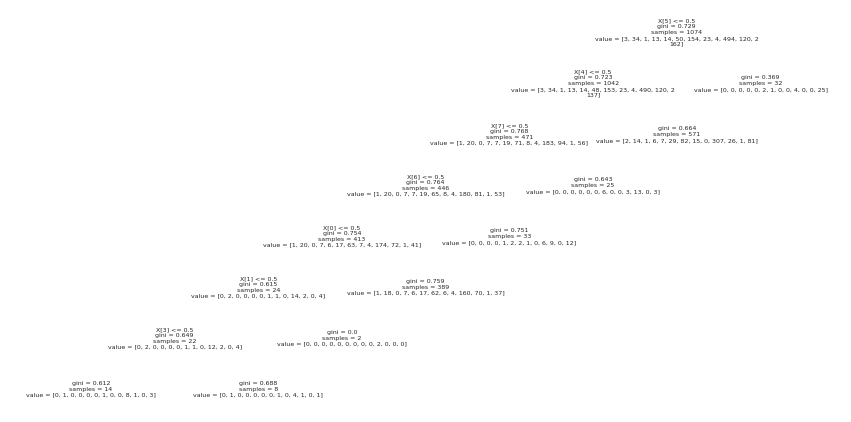

In [ ]:
## NOTE: We can plot the tree and it is huge!(## code works is this the right tree?)
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf_dt2)

In [ ]:
## plot_confusion_matrix() will run the test data down the tree and draw ##DOESNT WORK##
## a confusion matrix
#plot_confusion_matrix(clf_dt2, x2_test, y2_test, display_labels=["Does not have HD","Has HD"])

In [ ]:
#making predictions on the test data, after classifier has been trained
y2_pred = clf_dt2.predict(x2_test)

In [ ]:
## Evaluation of the algorithm.. confusion matrix doesnt apply?
## out of 359 test instances algorithm 
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0  16   0   0   0]
 [  0   0   0   0   0   0   7   0   0   0]
 [  0   0   0   0   0   0  14   0   0   0]
 [  0   0   0   0   0   0  47   1   0   0]
 [  0   0   0   0   0   0  10   0   0   1]
 [  0   0   0   0   0   0 169   0   0   1]
 [  0   0   0   0   0   0  40   5   0   3]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0  35   1   0   7]]
                     precision    recall  f1-score   support

            Assault       0.00      0.00      0.00         1
           Collapse       0.00      0.00      0.00        16
           Exposure       0.00      0.00      0.00         7
               Fall       0.00      0.00      0.00        14
             Impact       0.00      0.00      0.00        48
              Other       0.00      0.00      0.00        11
Stress/Overexertion       0.50      0.99      0.66       170
            Trapped       0.71      0.10      0.18        48
            Unknown

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####4. **Cost Complexity Pruning Optimization**

In [ ]:
path = clf_dt2.cost_complexity_pruning_path(x2_train, y2_train) # determine the values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

In [ ]:
clf_dts = [] # create an array into which we'll put decision tress

In [ ]:
## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
  clf_dt2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt2.fit(x2_train,y2_train)
  clf_dts.append(clf_dt2)

No handles with labels found to put in legend.


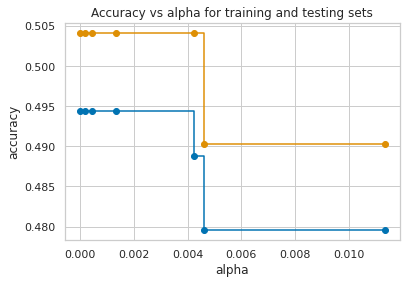

In [ ]:
## Graph accuracy of the trees using test/train data set as functions of alpha
## Blue -> Accuracy for training dataset
## Orange -> Accuracy for test dataset
## The Plot below shows that when alpha 0 (full tree) we do the best with the test dataset as opposed to the training data
## As alpha increases (the size of the tree gets smaller)  both our testing and training accuracy decreases. 
## The graph shows a good value for alpha would be cc 0.0045
train_scores2 = [clf_dt2.score(x2_train, y2_train) for clf_dt2 in clf_dts]
test_scores2 = [clf_dt2.score(x2_test, y2_test) for clf_dt2 in clf_dts]

fig, ax2 = plt.subplots()
ax2.set_xlabel("alpha")
ax2.set_ylabel("accuracy")
ax2.set_title("Accuracy vs alpha for training and testing sets")
ax2.plot(ccp_alphas,train_scores2, marker='o',label="train",drawstyle="steps-post")
ax2.plot(ccp_alphas,test_scores2,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

#####5. **Cross Validation: Finding the Best Alpha**

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


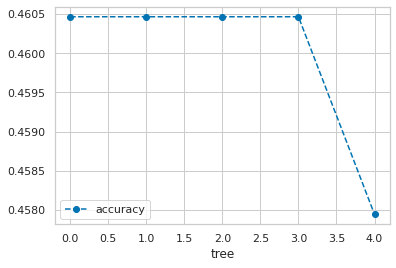

In [ ]:
## the graph below shows that using different training and testing data with the same alpha resulted in different accuracies
## suggesting that alpha is sensitive to the datasets. So instead of picking a single Trining dataset and a single testing dataset 
## we'll use cross validation to find the optimal value for "ccp_alpha"
from sklearn.model_selection import cross_val_score
clf_dt2 = DecisionTreeClassifier(random_state=42, ccp_alpha=0.045) # create the tree with ccp_alpha=0.045

## now use 5-fold cross validation - create 5 different training and testing datasets that
## are then used to train and test the tree.
## NOTE: We use 5-fold because we dont have tons of data... 
scores = cross_val_score(clf_dt2, x2_train, y2_train, cv =5)
df2 = pd.DataFrame(data={'tree': range(5),'accuracy': scores})

df2.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [ ]:
## create an array to store the results of each fold during cross validation
alpha_loop_values2 = []

In [ ]:
## For each candidate value for alpha, we will run 5-fold across validation. 
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values... 
for ccp_alpha in ccp_alphas:
  clf_dt2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt2, x2_train, y2_train, cv=5)
  alpha_loop_values2.append([ccp_alpha, np.mean(scores),np.std(scores)])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

In [ ]:
## Now we can draw a graph of the means and standard deviation of the scores
## for each candidate value for alpha
alpha_results2 = pd.DataFrame(alpha_loop_values2, 
                              columns=['alpha','mean_accuracy','std'])

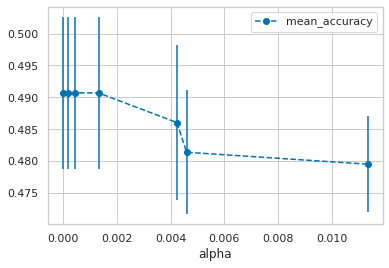

In [ ]:
## The graph below shows that iso setting our ccp_alpha=0.0045 we need to set it closer to 0.004
alpha_results2.plot(x='alpha',
                    y='mean_accuracy',
                    yerr='std',
                    marker='o',
                    linestyle='--')

In [ ]:
##We set the new alpha accordingly
alpha_results2[(alpha_results2['alpha'] > 0.0040)
& (alpha_results2['alpha'] < 0.0045)]

alpha  mean_accuracy       std
4  0.004237       0.486038  0.012125

In [ ]:
## store new alpha in a new variable so we can then later build the tree
## Python thinks below that this is a series.. we'll pick the first one or index 4
ideal_ccp_alpha2 = alpha_results2[(alpha_results2['alpha'] > 0.004)
& (alpha_results2['alpha'] < 0.45)]['alpha']

ideal_ccp_alpha2

4    0.004237
5    0.004597
6    0.011334
Name: alpha, dtype: float64

In [ ]:
## convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha2 = float(ideal_ccp_alpha2[4])
ideal_ccp_alpha2

0.004237173405146122

#####6. **Building, Evaluating, Drawing, and Interpreting Final Classification Tree**

In [ ]:
## Now that we have the ideal alpha value we can fuild the final Classifiation Tree by setting "ccp_alpha=ideal_ccp_alpha"
## We build and train a new decision tree, only this time we use the optimal value for alpha
clf_dt_pruned2 = DecisionTreeClassifier(random_state=42,
                                        ccp_alpha=ideal_ccp_alpha2)
clf_dt_pruned2 = clf_dt_pruned2.fit(x2_train, y2_train)

In [ ]:
## now we draw another confusion matrix to see if the pruned tree does better ## CODE DIDNT WORK##
#plot_confusion_matrix(clf_dt_pruned2, 
#                     x2_test, 
#                     y2_test, 
#                      display_labels=["Does not have HD","Has Hd"])

In [ ]:
#making predictions on the test data, after classifier has been trained
y2_pred2 = clf_dt_pruned2.predict(x2_test)

In [ ]:
## Evaluation of the algorithm.. confusion matrix doesnt apply?
## out of 359 test instances algorithm.. the precision improved by .03 at the nacro/weighted avg. 
print(confusion_matrix(y2_test, y2_pred2))
print(classification_report(y2_test, y2_pred2))

[[  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0  16   0   0   0]
 [  0   0   0   0   0   0   7   0   0   0]
 [  0   0   0   0   0   0  14   0   0   0]
 [  0   0   0   0   0   0  47   1   0   0]
 [  0   0   0   0   0   0  11   0   0   0]
 [  0   0   0   0   0   0 169   0   0   1]
 [  0   0   0   0   0   0  43   5   0   0]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0  35   1   0   7]]
                     precision    recall  f1-score   support

            Assault       0.00      0.00      0.00         1
           Collapse       0.00      0.00      0.00        16
           Exposure       0.00      0.00      0.00         7
               Fall       0.00      0.00      0.00        14
             Impact       0.00      0.00      0.00        48
              Other       0.00      0.00      0.00        11
Stress/Overexertion       0.49      0.99      0.66       170
            Trapped       0.71      0.10      0.18        48
            Unknown

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##Plot code didnt work##
#plt.figure(figsize=(15,7.5))
#plot_tree(clf_dt_pruned2,
#          filled=True,
#          rounded=True,
#          class_names=["No HD","Yes HD"],
#          feature_names=x2_encoded.columns);

[Text(558.0, 356.7375, 'X[5] <= 0.5\ngini = 0.729\nsamples = 1074\nvalue = [3, 34, 1, 13, 14, 50, 154, 23, 4, 494, 120, 2\n162]'),
 Text(418.5, 254.8125, 'X[4] <= 0.5\ngini = 0.723\nsamples = 1042\nvalue = [3, 34, 1, 13, 14, 48, 153, 23, 4, 490, 120, 2\n137]'),
 Text(279.0, 152.8875, 'X[7] <= 0.5\ngini = 0.768\nsamples = 471\nvalue = [1, 20, 0, 7, 7, 19, 71, 8, 4, 183, 94, 1, 56]'),
 Text(139.5, 50.96249999999998, 'gini = 0.764\nsamples = 446\nvalue = [1, 20, 0, 7, 7, 19, 65, 8, 4, 180, 81, 1, 53]'),
 Text(418.5, 50.96249999999998, 'gini = 0.643\nsamples = 25\nvalue = [0, 0, 0, 0, 0, 0, 6, 0, 0, 3, 13, 0, 3]'),
 Text(558.0, 152.8875, 'gini = 0.664\nsamples = 571\nvalue = [2, 14, 1, 6, 7, 29, 82, 15, 0, 307, 26, 1, 81]'),
 Text(697.5, 254.8125, 'gini = 0.369\nsamples = 32\nvalue = [0, 0, 0, 0, 0, 2, 1, 0, 0, 4, 0, 0, 25]')]

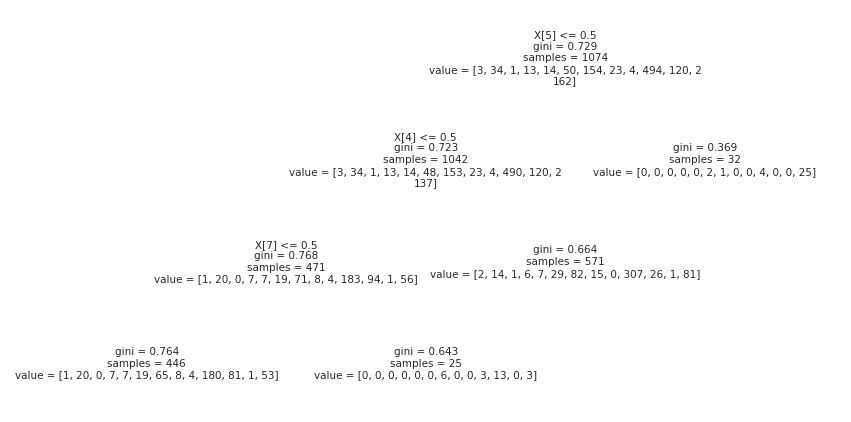

In [ ]:
## NOTE: We can plot the tree and it is huge!(## code works is this the right tree?)
## Gini of 0 represents the purity of the classification, and GINI of 0.5 shows an equail distribution of elements over some classes
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf_dt_pruned2)

### **Decision Tree Criteria and Training** - ALL Variables
#####1. **Data Split** 

In [ ]:
## Original df used for the split
data.head()

First Name Last Name Age Decade  ...     DOD T2 Time Difference Difference Month
0     Robert   Pollard  64   1990  ... 2000-01-01          1 days          1    12
1        Lee     Purdy  57   2000  ... 2000-01-08          0 days          0     1
2     Ronald   Osadacz  36   2000  ... 2000-01-11          0 days          0     1
3      Allen  Streeter  58   2000  ... 2000-01-11          0 days          0     1
5       Juan   De Leon  53   2000  ... 2000-01-17          0 days          0     1

[5 rows x 21 columns]

In [ ]:
## Copy of columns used to make prediction
x1 = data.drop(['First Name','Last Name','Age','Decade','Age_Group','Rank','Date of Incident','Date of Death','Cause Of Death','Year'], axis=1).copy()

In [ ]:
x1.head()

Classification Nature Of Death  ... Difference Month
0      Volunteer          Stroke  ...          1    12
1      Volunteer    Heart Attack  ...          0     1
2      Volunteer    Heart Attack  ...          0     1
3      Volunteer    Heart Attack  ...          0     1
5         Career    Heart Attack  ...          0     1

[5 rows x 11 columns]

In [ ]:
## Make a new copy of the column of data we want to predict
y1 = data['Cause Of Death'].copy()

In [ ]:
y1.head()

0    Stress/Overexertion
1    Stress/Overexertion
2    Stress/Overexertion
3    Stress/Overexertion
5    Stress/Overexertion
Name: Cause Of Death, dtype: object

#####2. **Validating Data Type Formats & Encoding**

In [ ]:
## data types are objects so these will need to be converted to numerical values
x1.dtypes

Classification              object
Nature Of Death             object
Duty                        object
Activity                    object
Emergency                   object
Property Type               object
DOI T1              datetime64[ns]
DOD T2              datetime64[ns]
Time Difference    timedelta64[ns]
Difference                   int64
Month                        int64
dtype: object

In [ ]:
## data types are objects so these will need to be converted to numerical values
y1.dtypes

dtype('O')

In [ ]:
## test.."get_dummies" to encode objects into numeric values
pd.get_dummies(x1, columns=['Classification']).head()

Nature Of Death  ... Classification_Wildland Part-Time
0          Stroke  ...                                 0
1    Heart Attack  ...                                 0
2    Heart Attack  ...                                 0
3    Heart Attack  ...                                 0
5    Heart Attack  ...                                 0

[5 rows x 18 columns]

In [ ]:
## Using "get_dummies" to encode objects into numeric values
x1_encoded = pd.get_dummies(x1, columns=['Classification',
                                         'Nature Of Death',
                                         'Duty',
                                         'Activity',
                                         'Emergency',
                                         'Property Type',])

x1_encoded.head()

DOI T1  ... Property Type_Vacant Property
0 1999-12-31  ...                             0
1 2000-01-08  ...                             0
2 2000-01-11  ...                             0
3 2000-01-11  ...                             0
5 2000-01-17  ...                             0

[5 rows x 65 columns]

In [ ]:
## checking unique values in encoded test data
x1_encoded['Classification_Career'].unique()

array([0, 1], dtype=uint8)

In [ ]:
## test.."get_dummies" to encode objects into numeric values for PREDICTED data variables
pd.get_dummies(y1, columns=['Cause Of Death']).head()

Assault  Collapse  Contact  ...  Trapped  Unknown  Vehicle Collision
0        0         0        0  ...        0        0                  0
1        0         0        0  ...        0        0                  0
2        0         0        0  ...        0        0                  0
3        0         0        0  ...        0        0                  0
5        0         0        0  ...        0        0                  0

[5 rows x 13 columns]

In [ ]:
## Using "get_dummies" to encode objects into numeric values for PREDICTED data variables
y1_encoded = pd.get_dummies(y1, columns=['Cause Of Death'])

y1_encoded.head()

Assault  Collapse  Contact  ...  Trapped  Unknown  Vehicle Collision
0        0         0        0  ...        0        0                  0
1        0         0        0  ...        0        0                  0
2        0         0        0  ...        0        0                  0
3        0         0        0  ...        0        0                  0
5        0         0        0  ...        0        0                  0

[5 rows x 13 columns]

In [ ]:
## checking unique values in encoded test data
y1_encoded['Fall'].unique()

array([0, 1], dtype=uint8)

#####3. **Building Preliminary Classification Tree**
(not optimized)

In [ ]:
## Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_encoded, y1, random_state =42)

In [ ]:
## Create/initialize a decision tree and fit it to the training data
#clf_dt = DecisionTreeClassifier(random_state=42)
# clf_dt = clf_dt.fit(x1_train, y1_train)

In [ ]:
## NOTE: We can plot the tree and it is huge!
#plt.figure(figsize=(15,7.5))
#tree.plot_tree(clf_dt)